## 1. Problem Definition
### Objective: Predict if a patient has heart disease based on medical attributes like age, cholesterol, ECG, etc.

##### Type: Binary Classification
##### Target Variable: target (0 = No Heart Disease, 1 = Heart Disease)

## 2. Data Collection
<p>Collected form Kaggle (<a>https://www.kaggle.com/datasets/jmhasan7/heart-disease-dataset</a>)</p>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset.csv")  
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### 3. Data Cleaning and Preprocessing

In [3]:
print(df.columns.tolist())

['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [39]:
# Check for nulls
print(df.isnull().sum())

# Data types and duplicates
print(df.info())
df = df.drop_duplicates()

# Convert categorical columns
df['sex'] = df['sex'].astype('category')
df['chest pain type'] = df['chest pain type'].astype('category')
df['fasting blood sugar'] = df['fasting blood sugar'].astype('category')
df['resting ecg'] = df['resting ecg'].astype('category')
df['exercise angina'] = df['exercise angina'].astype('category')
df['ST slope'] = df['ST slope'].astype('category')


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  918 non-null    int64   
 1   sex                  918 non-null    category
 2   chest pain type      918 non-null    category
 3   resting bp s         918 non-null    int64   
 4   cholesterol          918 non-null    int64   
 5   fasting blood sugar  918 non-null    category
 6   resting ecg          918 non-null    category
 7   max heart rate       918 non-null    int64   
 8   exercise angina      918 non-null    category
 9   oldpeak             

In [7]:
print(df.columns.tolist())

['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [9]:
# Define feature types
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 
                    'resting ecg', 'exercise angina', 
                    'ST slope']

numerical_cols = ['age', 'resting bp s', 'cholesterol', 
                  'max heart rate', 'oldpeak']


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [13]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## 4. Exploratory Data Analysis (EDA)

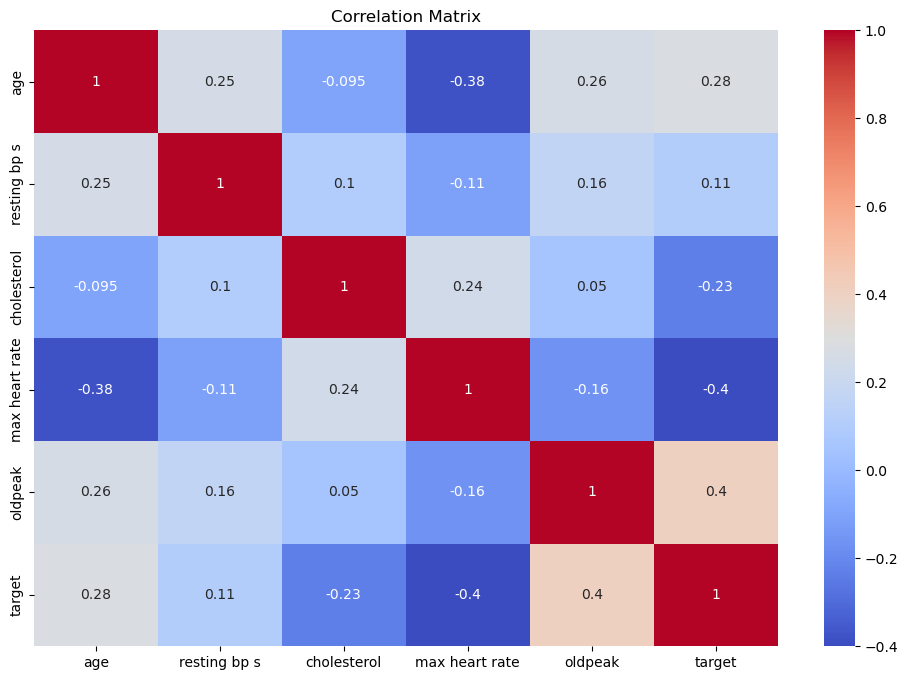

Text(0.5, 1.0, 'Heart Disease Distribution')

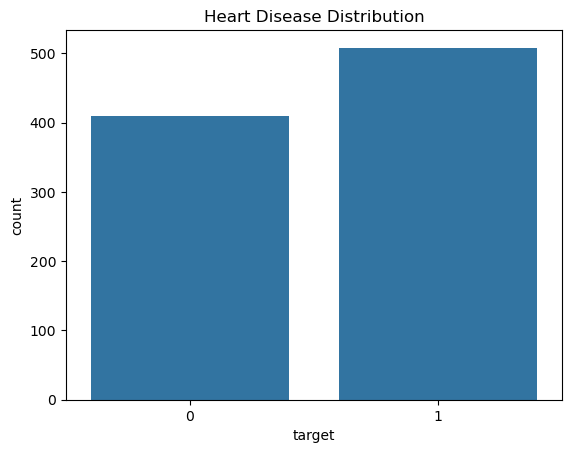

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of target
sns.countplot(data=df, x='target')
plt.title("Heart Disease Distribution")


## 5. Feature Engineering and Selection
<li>Encode categorical features

<li>Scale numerical features

In [17]:
print(df.columns.tolist())

['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


In [45]:
# from sklearn.preprocessing import StandardScaler

# # One-hot encoding for categorical variables
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Scale numerical columns
# scaler = StandardScaler()
# numeric_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
# df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [19]:
print(df.columns.tolist())


['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


## 6. Model Selection & Training
We have tried multiple models to find the best model for the task:
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
    <li>SVM</li>
    <li>KNN</li>
</ul>


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
print(X_train.columns.tolist())


['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


### 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        77
           1       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184



C:\Users\itsme\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Random Forest Classifier

In [21]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)

# print("Random Forest:")
# print(classification_report(y_test, rf_pred))


In [31]:
print(X_train.columns.tolist())


['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


In [33]:
# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest:


NameError: name 'rf_pred' is not defined

### 3. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("SVM:")
print(classification_report(y_test, svm_pred))


## 4.K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN:")
print(classification_report(y_test, knn_pred))


### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, xgb_pred))


### Comparing all models

In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn,
    "XGBoost": xgb  # if used
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.4f}")


### 7. Model Evluation and Tuning

In [ ]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm,
    "KNN": knn,
    "XGBoost": xgb 
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


#### Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


#### Plotting ROC-AUC Curves

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()


#### Hyperparameter Tuning (Random Forest Example)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate on test
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


#### Hyperparameter Tuning for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 1]
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_svm.fit(X_train, y_train)

# Get the best tuned model
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Evaluate
from sklearn.metrics import classification_report
y_pred_svm = best_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))


#### After Hyperparameter tuning of RF & SVM (evaluate and comare with other models)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import pandas as pd


##### Defining the Comparison Function

In [ ]:
def compare_models(models: dict, X_test, y_test, show_confusion=False):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Some models may not have predict_proba (e.g., SVM with linear kernel)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            try:
                y_proba = model.decision_function(X_test)
            except:
                y_proba = None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": auc
        })

        if show_confusion:
            cm = confusion_matrix(y_test, y_pred)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.title(f"Confusion Matrix - {name}")
            plt.show()

    results_df = pd.DataFrame(results)
    return results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)


In [ ]:
models = {
    "Logistic Regression": lr,
    "Random Forest (Tuned)": best_rf,
    "SVM (Tuned)": best_svm,
    "KNN": knn,
    "XGBoost": xgb
}

results_df = compare_models(models, X_test, y_test, show_confusion=True)
print(results_df)


In [ ]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# import pickle

# # Save best model (e.g., Random Forest or SVM)
# with open("heart_model.pkl", "wb") as f:
#     pickle.dump(best_rf, f)


In [ ]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
